(10, 2)
[[ 1.00507879  4.59464203]
 [ 1.12847762  4.32812233]
 [ 2.11788106  0.72684451]
 [ 0.95562631  4.38590703]
 [-1.35401677  2.76944926]
 [-1.07295309  2.62700913]
 [-2.03750198  3.04860598]
 [ 2.35408334  0.85663201]
 [ 2.14404017  0.96439853]
 [ 1.16628776  4.27351589]]


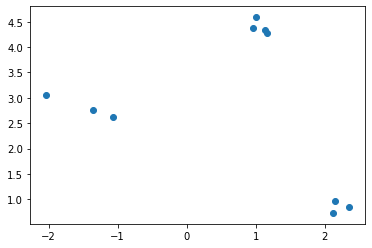

In [16]:
# We will use the make_blobs method module from sklearn.datasets module for creating the toy data for this experiment

# Imports
from sklearn.datasets.samples_generator import make_blobs

# Generate 2D data points
X, y = make_blobs(n_samples=10, centers=3, n_features=2,
                 cluster_std=0.2,  random_state=0)


# make_blobs method generate isotropic Gaussian blobs for clustering. Read more in the User Guide.

# n_samples : int, optional (default=100)
# The total number of points equally divided among clusters.
# n_features : int, optional (default=2)
# The number of features for each sample.
# centers : int or array of shape [n_centers, n_features], optional
# (default=3) The number of centers to generate, or the fixed center locations.
# cluster_std: float or sequence of floats, optional (default=1.0)
# The standard deviation of the clusters.
# center_box: pair of floats (min, max), optional (default=(-10.0, 10.0))
# The bounding box for each cluster center when centers are generated at random.
# shuffle : boolean, optional (default=True)
# Shuffle the samples.
# random_state : int, RandomState instance or None, optional (default=None)
# If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

# Returns
# X : array of shape [n_samples, n_features]
# The generated samples.
# y : array of shape [n_samples]
# The integer labels for cluster membership of each sample.

print(X.shape)
print (X)
#Visualization 
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, -1])

In [2]:
# Convert the data points into a pandas DataFrame
import pandas as pd

# Generate object header for the data points
obj_names = []
for i in range(1, 11):
    obj = "Object " + str(i)
    obj_names.append(obj)

# Create a pandas DataFrame with the names and (x, y) coordinates
data = pd.DataFrame({
    'Object': obj_names,
    'X_value': X[:, 0],
    'Y_value': X[:, -1]
})

# Preview the data
print(data.head())

     Object   X_value   Y_value
0  Object 1  1.005079  4.594642
1  Object 2  1.128478  4.328122
2  Object 3  2.117881  0.726845
3  Object 4  0.955626  4.385907
4  Object 5 -1.354017  2.769449


In [3]:
# To start using K-Means, you need to specify the number of K which is nothing but the number of clusters you want 
# out of the data. We will use K = 3

# Below is the step-by-step implementation of the algorithm

# You start the process by taking three(as we decided K to be 3) random points (in the form of (x, y)). 
# These points are called centroids or centers. Let’s name these three points - C1, C2, and C3 

# Initialize the centroids
c1 = (-1, 4)
c2 = (-0.2, 1.5)
c3 = (2, 2.5)

In [4]:
# Calculate distances between the centroids and the data points
# Next, you measure the distances of the data points from these three randomly chosen points. A very popular choice of 
# distance measurement function, in this case, is the Euclidean distance.

# Let's write a small helper function to calculate the Euclidean distances between the data points and centroids.

import numpy as np

def calculate_distance(centroid, X, Y):
    distances = []
        
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
        
    # Iterate over the data points and calculate the distance 
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
        
    return distances


In [5]:
# We can now apply this function to the data points and assign the results in the DataFrame accordingly

# Calculate the distance and assign them to the DataFrame accordingly
data['C1_Distance'] = calculate_distance(c1, data.X_value, data.Y_value)
data['C2_Distance'] = calculate_distance(c2, data.X_value, data.Y_value)
data['C3_Distance'] = calculate_distance(c3, data.X_value, data.Y_value)

# Preview the data
print(data.head())

     Object   X_value   Y_value  C1_Distance  C2_Distance  C3_Distance
0  Object 1  1.005079  4.594642     2.091397     3.320997     2.318921
1  Object 2  1.128478  4.328122     2.153620     3.124601     2.025236
2  Object 3  2.117881  0.726845     4.520479     2.443428     1.777070
3  Object 4  0.955626  4.385907     1.993339     3.108686     2.155774
4  Object 5 -1.354017  2.769449     1.280462     1.715592     3.364823


In [9]:
# The final step
# Once you have the distances between the data points and the centroids, you compare the distances and take the smallest
# ones. The centroid to which the distance for a particular data point is the smallest, that centroid gets assigned as 
# the cluster for that particular data point.

# Get the minimum distance centroids
data['Cluster'] = data[['C1_Distance', 'C2_Distance', 'C3_Distance']].apply(np.argmin, axis =1)
    
# Map the centroids accordingly and rename them
data['Cluster'] = data['Cluster'].map({'C1_Distance': 'C1', 'C2_Distance': 'C2', 'C3_Distance': 'C3'})
    
# Get a preview of the data
print(data)



      Object   X_value   Y_value  C1_Distance  C2_Distance  C3_Distance  \
0   Object 1  1.005079  4.594642     2.091397     3.320997     2.318921   
1   Object 2  1.128478  4.328122     2.153620     3.124601     2.025236   
2   Object 3  2.117881  0.726845     4.520479     2.443428     1.777070   
3   Object 4  0.955626  4.385907     1.993339     3.108686     2.155774   
4   Object 5 -1.354017  2.769449     1.280462     1.715592     3.364823   
5   Object 6 -1.072953  2.627009     1.374928     1.425551     3.075577   
6   Object 7 -2.037502  3.048606     1.407679     2.403038     4.074603   
7   Object 8  2.354083  0.856632     4.596807     2.633869     1.681081   
8   Object 9  2.144040  0.964399     4.370339     2.404453     1.542342   
9  Object 10  1.166288  4.273516     2.183487     3.091785     1.959703   

  Cluster  
0      C1  
1      C3  
2      C3  
3      C1  
4      C1  
5      C1  
6      C1  
7      C3  
8      C3  
9      C3  


In [10]:
# Updating the centroids
# Determine the mean values of the coordinates of the data points (which should be belonging to some centroid by now).

# Calculate the coordinates of the new centroid from cluster 1
x_new_centroid1 = data[data['Cluster']=='C1']['X_value'].mean()
y_new_centroid1 = data[data['Cluster']=='C1']['Y_value'].mean()

# Calculate the coordinates of the new centroid from cluster 2
x_new_centroid2 = data[data['Cluster']=='C3']['X_value'].mean()
y_new_centroid2 = data[data['Cluster']=='C3']['Y_value'].mean()

# Print the coordinates of the new centroids
print('Centroid 1 ({}, {})'.format(x_new_centroid1, y_new_centroid1))
print('Centroid 2 ({}, {})'.format(x_new_centroid2, y_new_centroid2))



Centroid 1 (-0.500753347459331, 3.4851226841526897)
Centroid 2 (1.7821539902873855, 2.2299026522421928)


In [11]:
# K-Means clustering with scikit-learn
# The K-Means method from the sklearn.cluster module makes the implementation of K-Means algorithm

from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)

[[-1.48815728  2.81502145]
 [ 2.20533486  0.84929168]
 [ 1.06386762  4.39554682]]
[2 2 1 2 0 0 0 1 1 2]


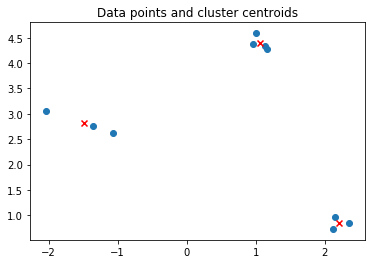

In [15]:
# Plotting the cluster centers and the data points on a 2D plane
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, -1])
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()